### Importa√ß√£o dos dados



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

In [7]:
print(loja.columns)

Index(['Produto', 'Categoria do Produto', 'Pre√ßo', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avalia√ß√£o da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


#1. An√°lise do faturamento


In [8]:
# An√°lise do Faturamento (Soma da coluna 'Pre√ßo')
faturamento_loja1 = loja['Pre√ßo'].sum()
print(f"Faturamento Loja 1: R$ {faturamento_loja1:.2f}")

faturamento_loja2 = loja2['Pre√ßo'].sum()
print(f"Faturamento Loja 2: R$ {faturamento_loja2:.2f}")

faturamento_loja3 = loja3['Pre√ßo'].sum()
print(f"Faturamento Loja 3: R$ {faturamento_loja3:.2f}")

faturamento_loja4 = loja4['Pre√ßo'].sum()
print(f"Faturamento Loja 4: R$ {faturamento_loja4:.2f}")

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58


<ipython-input-9-b465f8bbeb23>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Faturamento', y='Loja', data=faturamento_total, palette="viridis", ax=axes_faturamento[0])


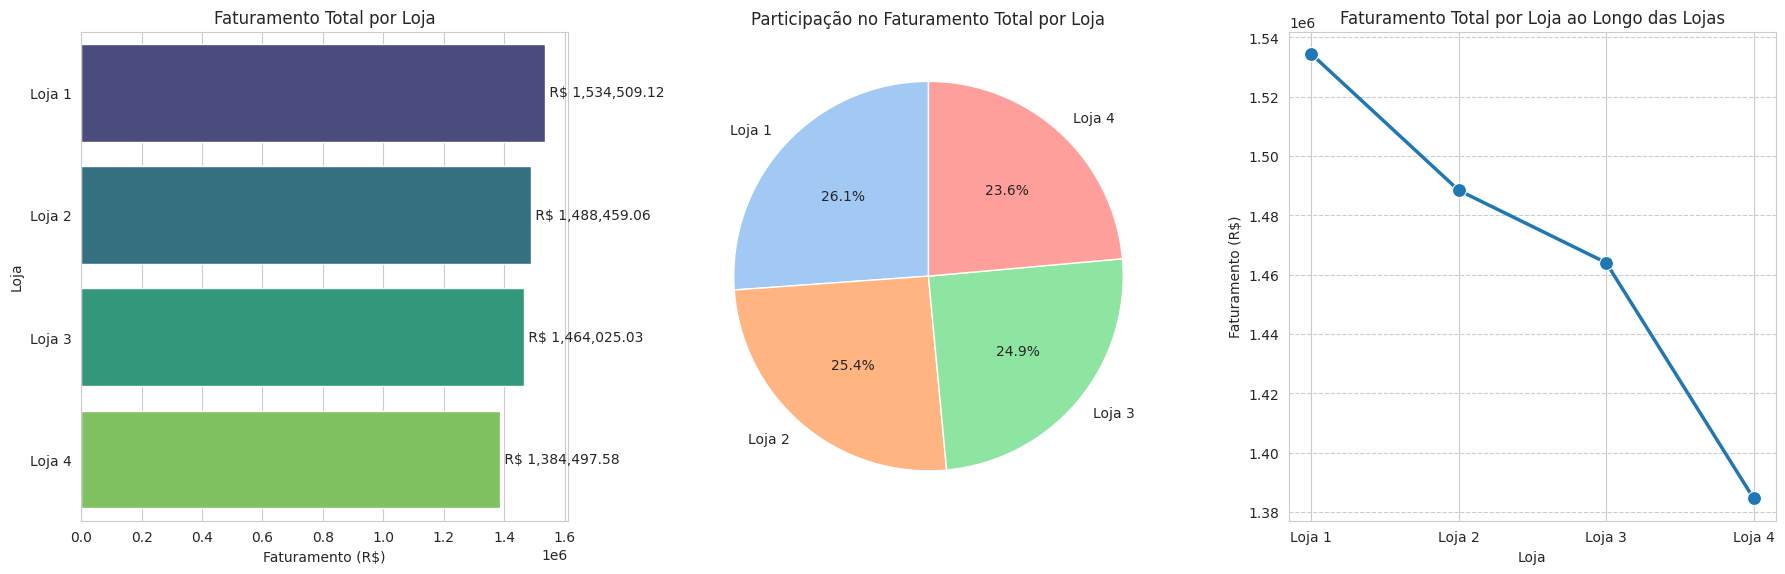

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

faturamento_total = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

# Gr√°ficos de Faturamento
fig_faturamento, axes_faturamento = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Faturamento', y='Loja', data=faturamento_total, palette="viridis", ax=axes_faturamento[0])
axes_faturamento[0].set_title('Faturamento Total por Loja')
axes_faturamento[0].set_xlabel('Faturamento (R$)')
axes_faturamento[0].set_ylabel('Loja')
for index, value in enumerate(faturamento_total['Faturamento']):
    axes_faturamento[0].text(value, index, f' R$ {value:,.2f}', va='center')

axes_faturamento[1].pie(faturamento_total['Faturamento'], labels=faturamento_total['Loja'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes_faturamento[1].set_title('Participa√ß√£o no Faturamento Total por Loja')

sns.lineplot(x='Loja', y='Faturamento', data=faturamento_total, marker='o', linewidth=2.5, markersize=10, ax=axes_faturamento[2])
axes_faturamento[2].set_title('Faturamento Total por Loja ao Longo das Lojas')
axes_faturamento[2].set_xlabel('Loja')
axes_faturamento[2].set_ylabel('Faturamento (R$)')
axes_faturamento[2].grid(axis='y', linestyle='--')

fig_faturamento.subplots_adjust(wspace=0.4) # Adicionado para o espa√ßamento

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [10]:
# Vendas por Categoria (baseado no faturamento)
vendas_categoria_loja1 = loja.groupby('Categoria do Produto')['Pre√ßo'].sum().sort_values(ascending=False)
print("\nVendas por Categoria - Loja 1:\n", vendas_categoria_loja1)

vendas_categoria_loja2 = loja2.groupby('Categoria do Produto')['Pre√ßo'].sum().sort_values(ascending=False)
print("\nVendas por Categoria - Loja 2:\n", vendas_categoria_loja2)

vendas_categoria_loja3 = loja3.groupby('Categoria do Produto')['Pre√ßo'].sum().sort_values(ascending=False)
print("\nVendas por Categoria - Loja 3:\n", vendas_categoria_loja3)

vendas_categoria_loja4 = loja4.groupby('Categoria do Produto')['Pre√ßo'].sum().sort_values(ascending=False)
print("\nVendas por Categoria - Loja 4:\n", vendas_categoria_loja4)


Vendas por Categoria - Loja 1:
 Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Pre√ßo, dtype: float64

Vendas por Categoria - Loja 2:
 Categoria do Produto
eletronicos              547773.71
eletrodomesticos         464758.13
moveis                   235234.68
instrumentos musicais    139987.03
esporte e lazer           46326.09
brinquedos                21262.21
utilidades domesticas     19662.86
livros                    13454.35
Name: Pre√ßo, dtype: float64

Vendas por Categoria - Loja 3:
 Categoria do Produto
eletronicos              547699.92
eletrodomesticos         438984.89
moveis                   268095.56
instrumentos musicais    103174.45
esporte e lazer           47456.10
brinquedos                25869.20
utilidades

<ipython-input-11-4c5e8cbed9a9>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_por_categoria.index, y=faturamento_por_categoria.values, palette="viridis")


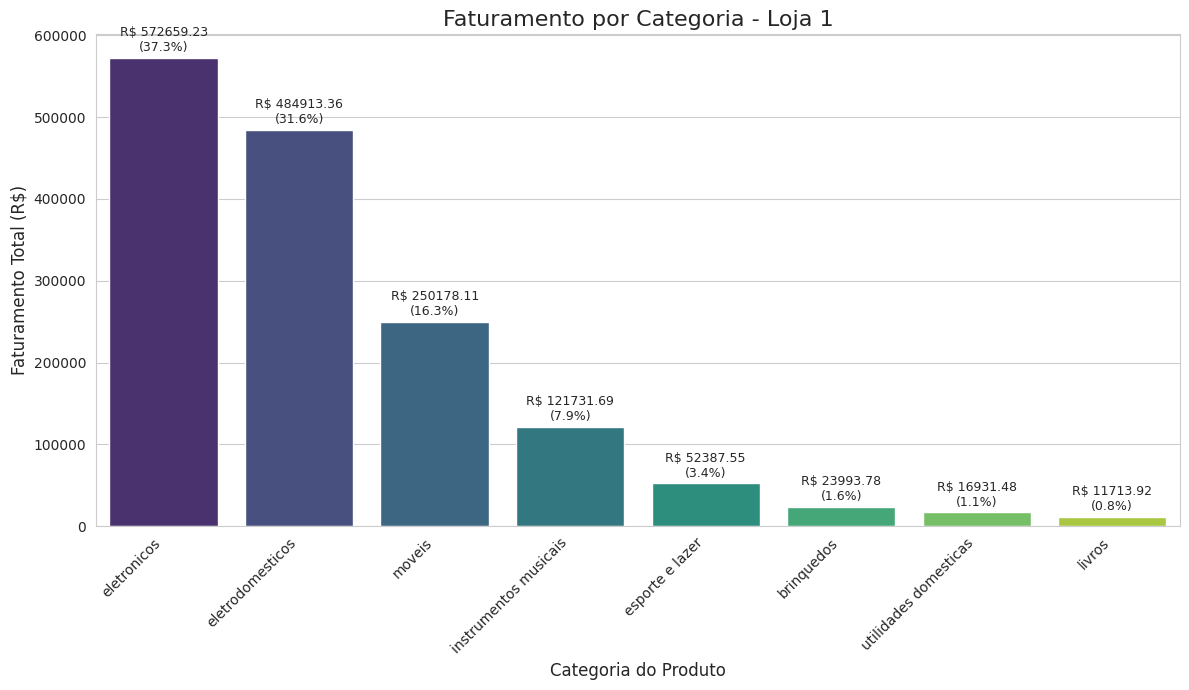

<ipython-input-11-4c5e8cbed9a9>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_por_categoria.index, y=faturamento_por_categoria.values, palette="viridis")


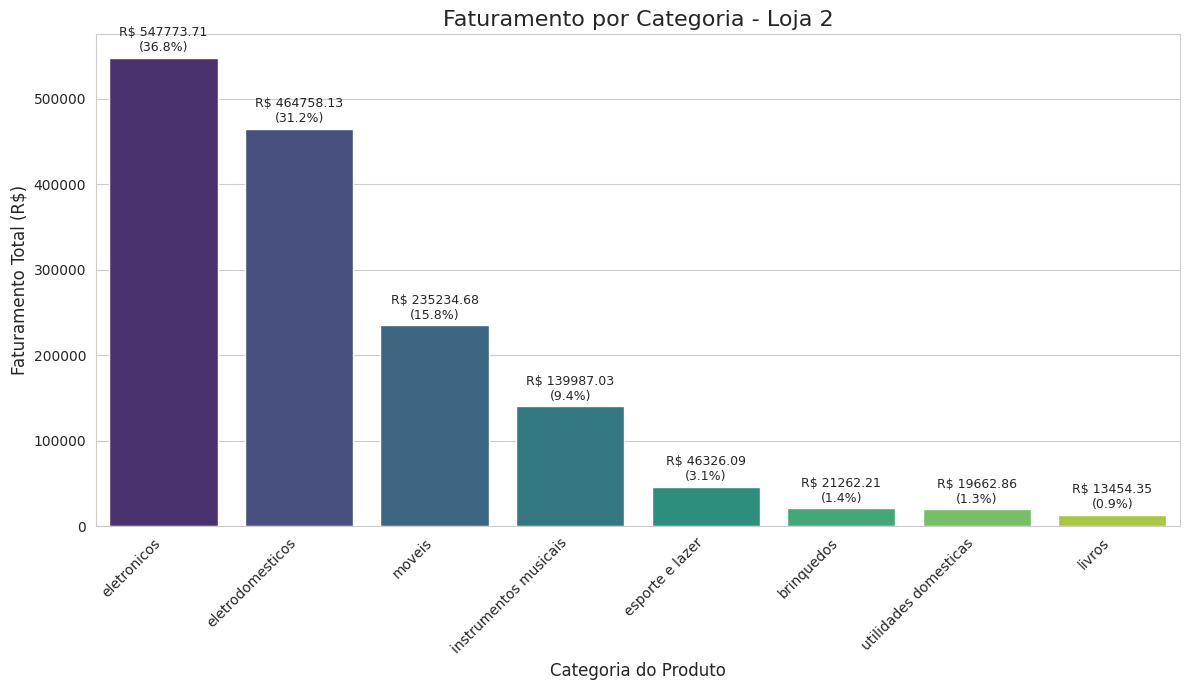

<ipython-input-11-4c5e8cbed9a9>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_por_categoria.index, y=faturamento_por_categoria.values, palette="viridis")


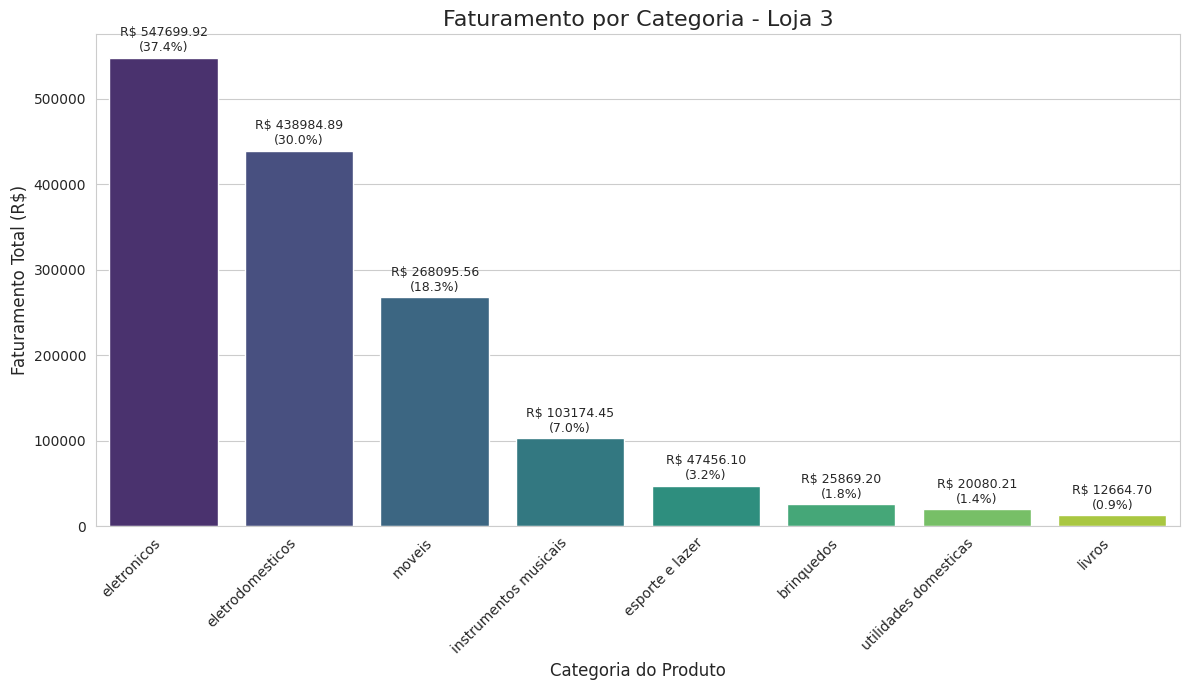

<ipython-input-11-4c5e8cbed9a9>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_por_categoria.index, y=faturamento_por_categoria.values, palette="viridis")


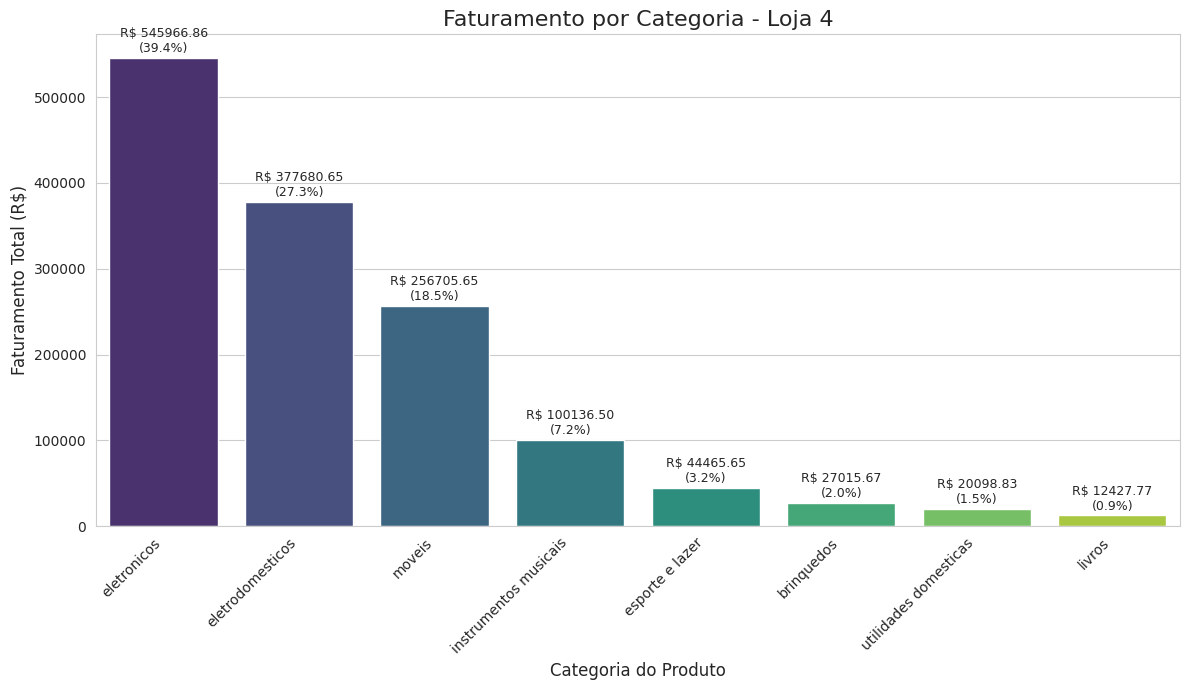

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1_df = pd.read_csv(url)
loja2_df = pd.read_csv(url2)
loja3_df = pd.read_csv(url3)
loja4_df = pd.read_csv(url4)

def plot_faturamento_percentual_categoria(df, loja_nome):
    # Calcular faturamento por categoria
    faturamento_por_categoria = df.groupby('Categoria do Produto')['Pre√ßo'].sum().sort_values(ascending=False)

    # Calcular faturamento total da loja
    faturamento_total_loja = df['Pre√ßo'].sum()

    # Calcular percentual de cada categoria
    percentual_por_categoria = (faturamento_por_categoria / faturamento_total_loja) * 100

    # Criar a figura
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x=faturamento_por_categoria.index, y=faturamento_por_categoria.values, palette="viridis")
    plt.title(f'Faturamento por Categoria - {loja_nome}', fontsize=16)
    plt.xlabel('Categoria do Produto', fontsize=12)
    plt.ylabel('Faturamento Total (R$)', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Adicionar as anota√ß√µes com valor e percentual
    for i, (categoria, faturamento) in enumerate(faturamento_por_categoria.items()):
        percentual = percentual_por_categoria[categoria]
        ax.text(i, faturamento + 0.05 * faturamento_total_loja * 0.1,  # Ajuste na posi√ß√£o vertical
                f'R$ {faturamento:.2f}\n({percentual:.1f}%)',
                ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Plotar para cada loja
plot_faturamento_percentual_categoria(loja1_df, 'Loja 1')
plot_faturamento_percentual_categoria(loja2_df, 'Loja 2')
plot_faturamento_percentual_categoria(loja3_df, 'Loja 3')
plot_faturamento_percentual_categoria(loja4_df, 'Loja 4')

# 3. M√©dia de Avalia√ß√£o das Lojas

In [12]:
# M√©dia de Avalia√ß√£o das Lojas
media_avaliacao_loja1 = loja['Avalia√ß√£o da compra'].mean()
print(f"\nM√©dia de Avalia√ß√£o - Loja 1: {media_avaliacao_loja1:.2f}")

media_avaliacao_loja2 = loja2['Avalia√ß√£o da compra'].mean()
print(f"M√©dia de Avalia√ß√£o - Loja 2: {media_avaliacao_loja2:.2f}")

media_avaliacao_loja3 = loja3['Avalia√ß√£o da compra'].mean()
print(f"M√©dia de Avalia√ß√£o - Loja 3: {media_avaliacao_loja3:.2f}")

media_avaliacao_loja4 = loja4['Avalia√ß√£o da compra'].mean()
print(f"M√©dia de Avalia√ß√£o - Loja 4: {media_avaliacao_loja4:.2f}")


M√©dia de Avalia√ß√£o - Loja 1: 3.98
M√©dia de Avalia√ß√£o - Loja 2: 4.04
M√©dia de Avalia√ß√£o - Loja 3: 4.05
M√©dia de Avalia√ß√£o - Loja 4: 4.00


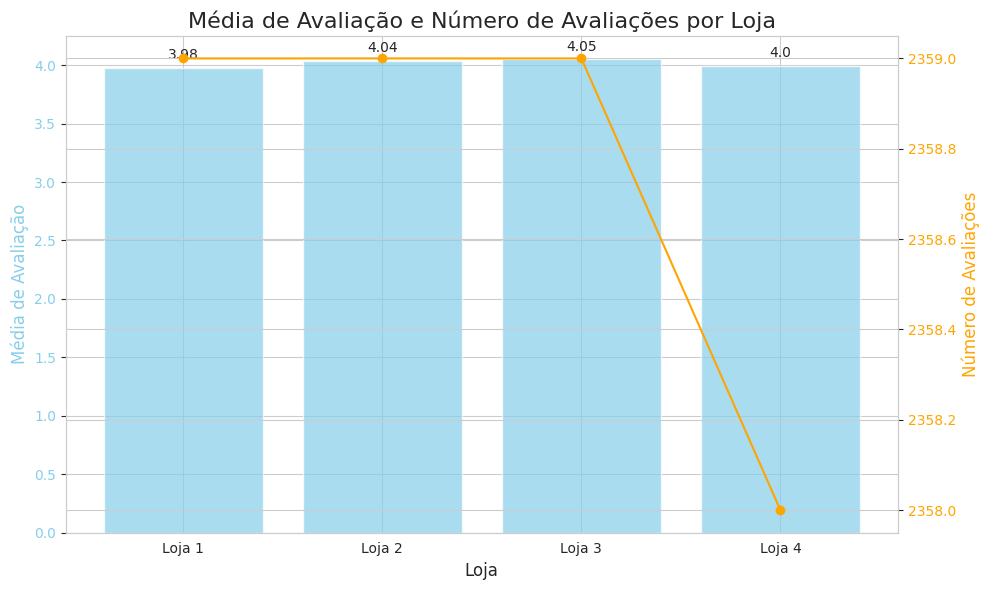

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1_df = pd.read_csv(url)
loja2_df = pd.read_csv(url2)
loja3_df = pd.read_csv(url3)
loja4_df = pd.read_csv(url4)

lojas = {
    'Loja 1': loja1_df,
    'Loja 2': loja2_df,
    'Loja 3': loja3_df,
    'Loja 4': loja4_df
}

fig, ax1 = plt.subplots(figsize=(10, 6))

# Calcular m√©dias de avalia√ß√£o
medias_avaliacao = {loja: df['Avalia√ß√£o da compra'].mean() for loja, df in lojas.items()}
lojas_nomes = list(medias_avaliacao.keys())
valores_medias = list(medias_avaliacao.values())

# Plotar m√©dias de avalia√ß√£o como barras
color = 'skyblue'
ax1.set_xlabel('Loja', fontsize=12)
ax1.set_ylabel('M√©dia de Avalia√ß√£o', color=color, fontsize=12)
bars = ax1.bar(lojas_nomes, valores_medias, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Adicionar os valores da m√©dia nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Criar o segundo eixo para o n√∫mero de avalia√ß√µes
ax2 = ax1.twinx()
color = 'orange'
ax2.set_ylabel('N√∫mero de Avalia√ß√µes', color=color, fontsize=12)
numero_avaliacoes = {loja: len(df) for loja, df in lojas.items()}
valores_numero_avaliacoes = list(numero_avaliacoes.values())
ax2.plot(lojas_nomes, valores_numero_avaliacoes, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('M√©dia de Avalia√ß√£o e N√∫mero de Avalia√ß√µes por Loja', fontsize=16)
fig.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [14]:
# Produtos Mais e Menos Vendidos (contando a frequ√™ncia do produto)
# Loja 1
produtos_mais_vendidos_loja1 = loja['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 1 (por frequ√™ncia):\n", produtos_mais_vendidos_loja1)
produtos_menos_vendidos_loja1 = loja['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 1 (por frequ√™ncia):\n", produtos_menos_vendidos_loja1)

# Loja 2
produtos_mais_vendidos_loja2 = loja2['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 2 (por frequ√™ncia):\n", produtos_mais_vendidos_loja2)
produtos_menos_vendidos_loja2 = loja2['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 2 (por frequ√™ncia):\n", produtos_menos_vendidos_loja2)

# Loja 3
produtos_mais_vendidos_loja3 = loja3['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 3 (por frequ√™ncia):\n", produtos_mais_vendidos_loja3)
produtos_menos_vendidos_loja3 = loja3['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 3 (por frequ√™ncia):\n", produtos_menos_vendidos_loja3)

# Loja 4
produtos_mais_vendidos_loja4 = loja4['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 4 (por frequ√™ncia):\n", produtos_mais_vendidos_loja4)
produtos_menos_vendidos_loja4 = loja4['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 4 (por frequ√™ncia):\n", produtos_menos_vendidos_loja4)


Top 5 Produtos Mais Vendidos - Loja 1 (por frequ√™ncia):
 Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
C√¥moda                56
Name: count, dtype: int64

Top 5 Produtos Menos Vendidos - Loja 1 (por frequ√™ncia):
 Produto
Headset              33
Celular ABXY         33
Panela de press√£o    35
Pandeiro             36
Mochila              39
Name: count, dtype: int64

Top 5 Produtos Mais Vendidos - Loja 2 (por frequ√™ncia):
 Produto
Iniciando em programa√ß√£o    65
Micro-ondas                 62
Bateria                     61
Viol√£o                      58
Pandeiro                    58
Name: count, dtype: int64

Top 5 Produtos Menos Vendidos - Loja 2 (por frequ√™ncia):
 Produto
Jogo de tabuleiro    32
Mesa de jantar       34
Impressora           34
Poltrona             35
Fone de ouvido       37
Name: count, dtype: int64

Top 5 Produtos Mais Vendidos - Loja 3 (por frequ√™ncia):
 Produto
Kit banquetas      57
Mesa de jant

<ipython-input-15-e03318d8d739>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


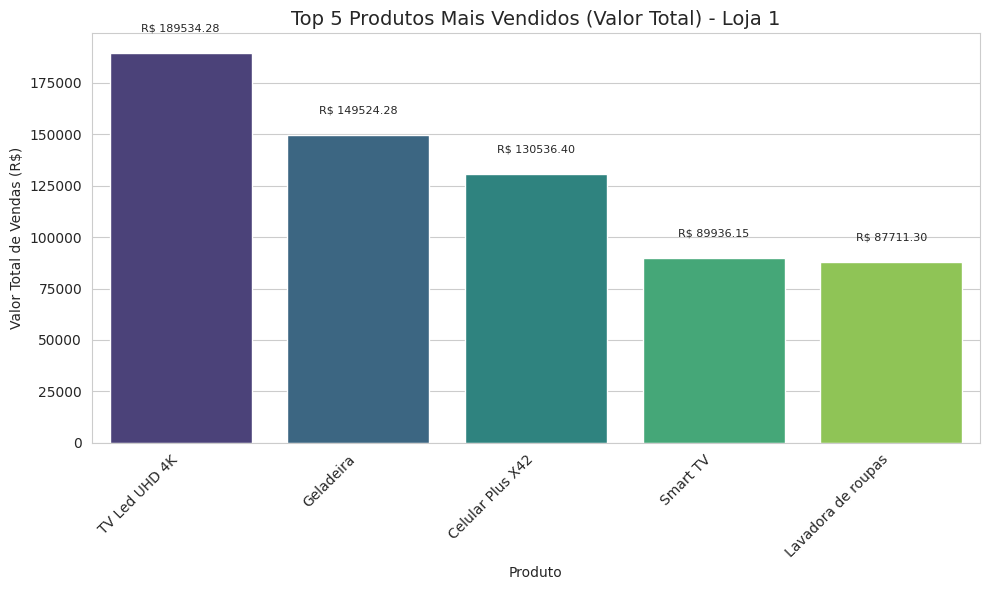

<ipython-input-15-e03318d8d739>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


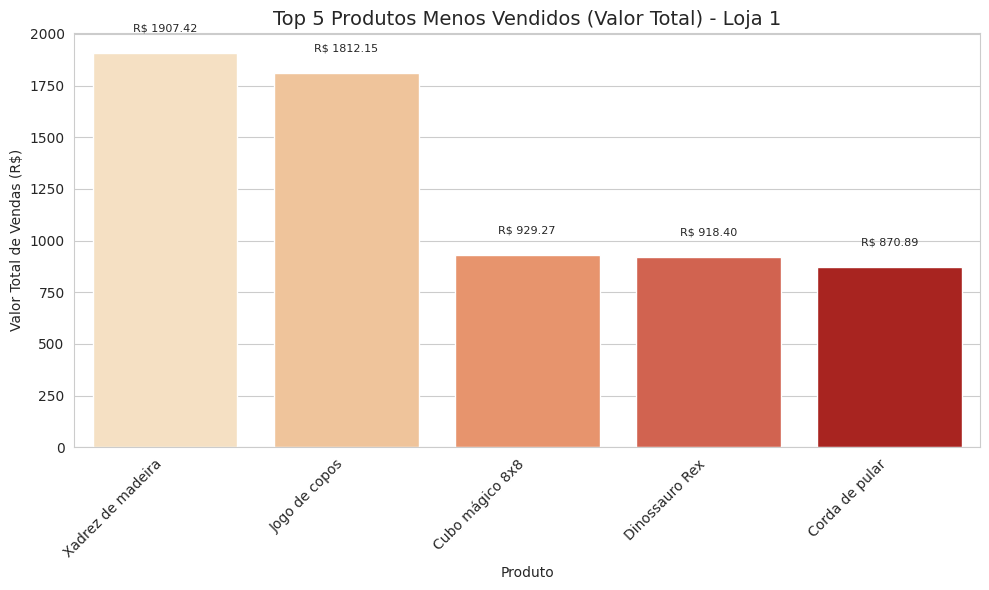

<ipython-input-15-e03318d8d739>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


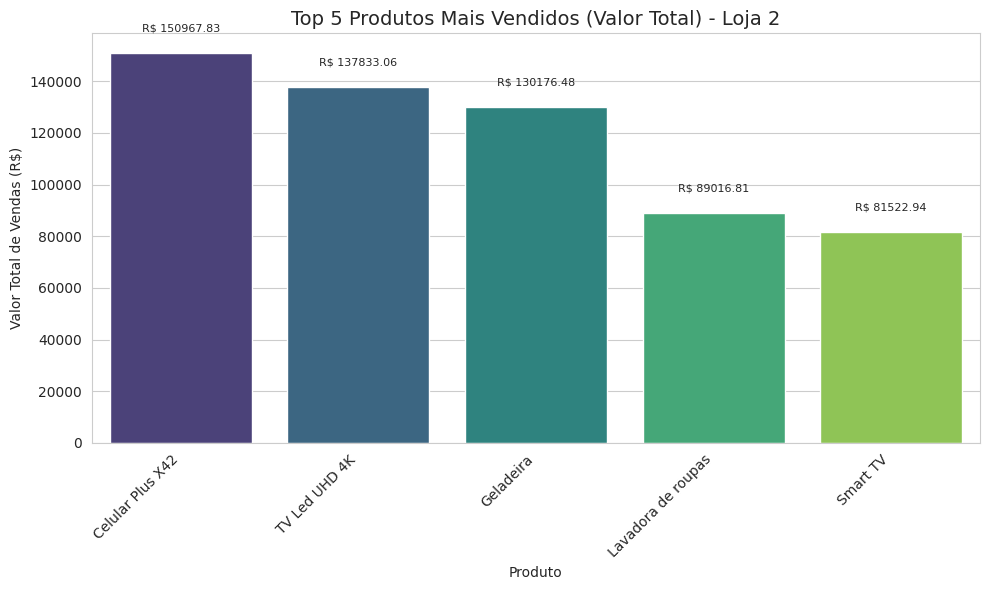

<ipython-input-15-e03318d8d739>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


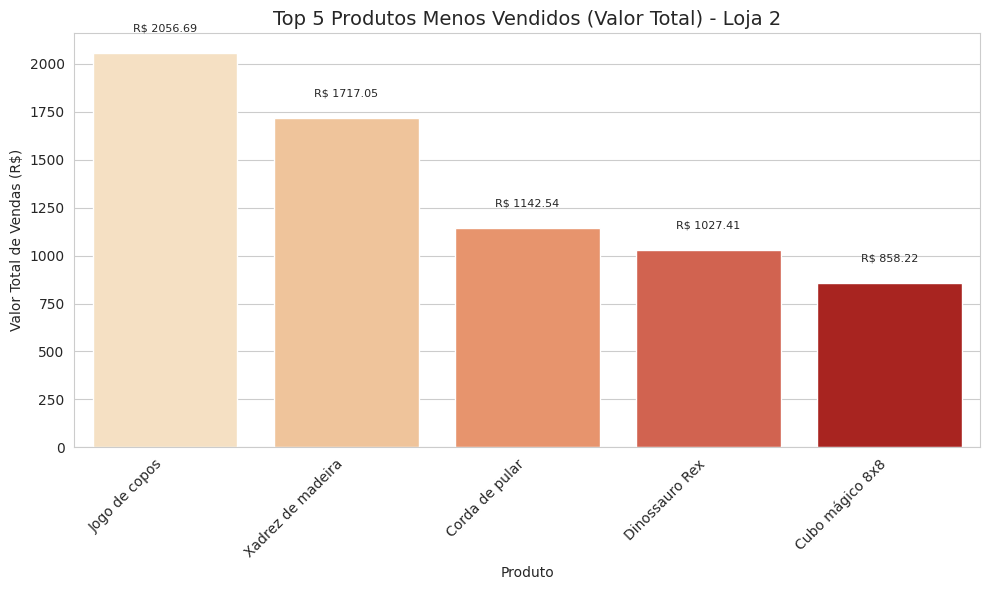

<ipython-input-15-e03318d8d739>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


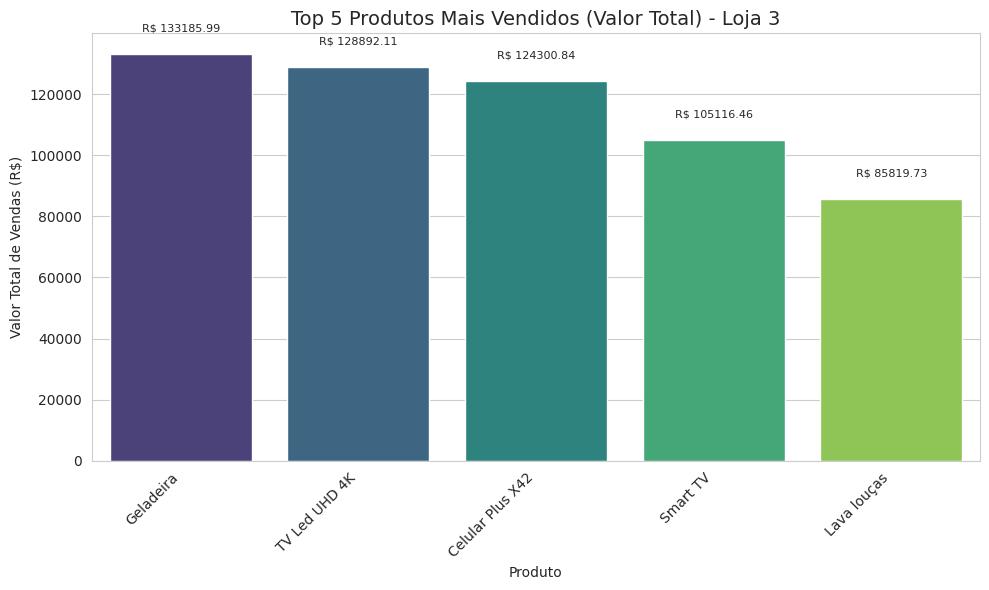

<ipython-input-15-e03318d8d739>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


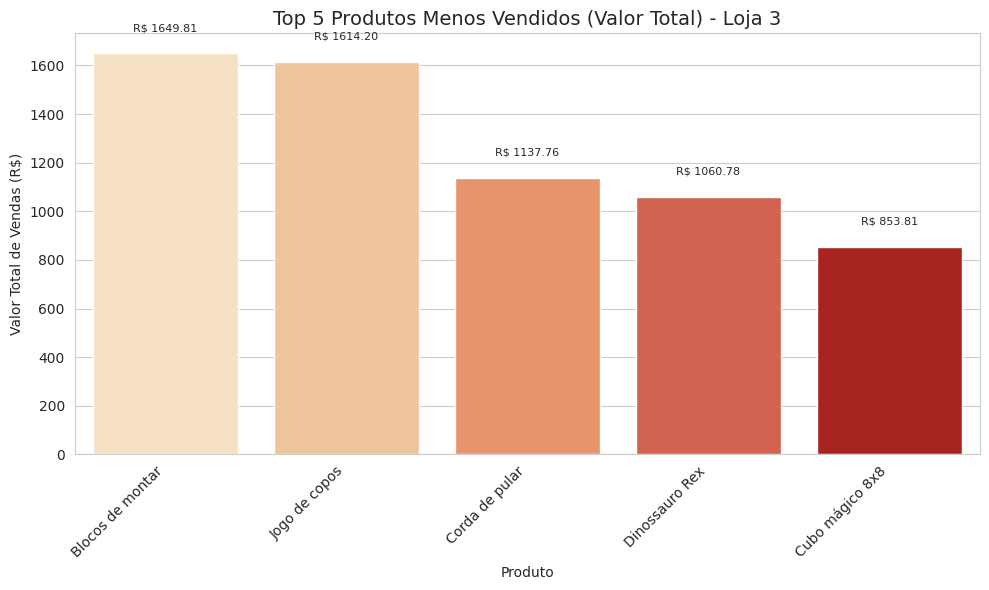

<ipython-input-15-e03318d8d739>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


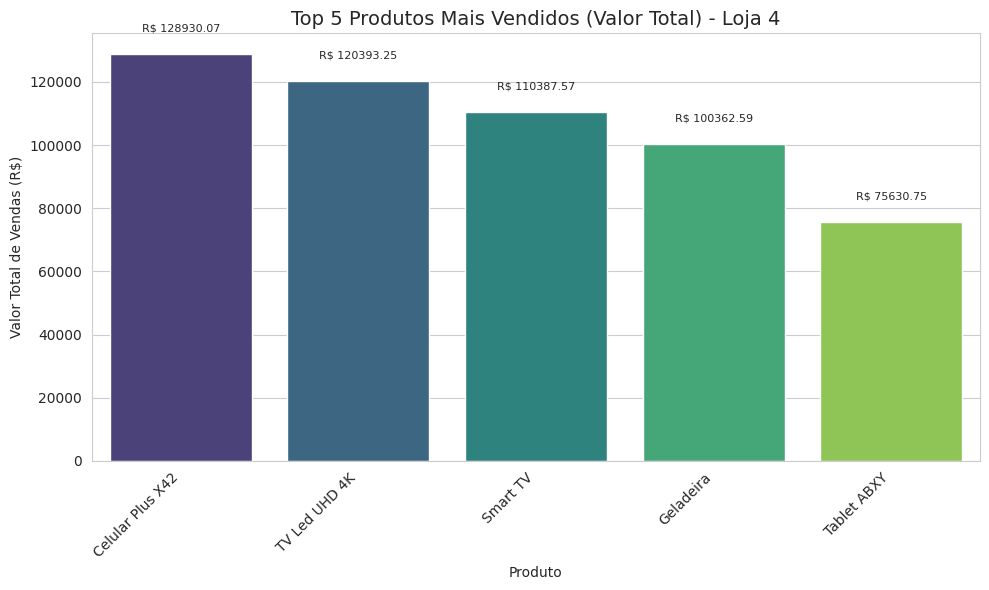

<ipython-input-15-e03318d8d739>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


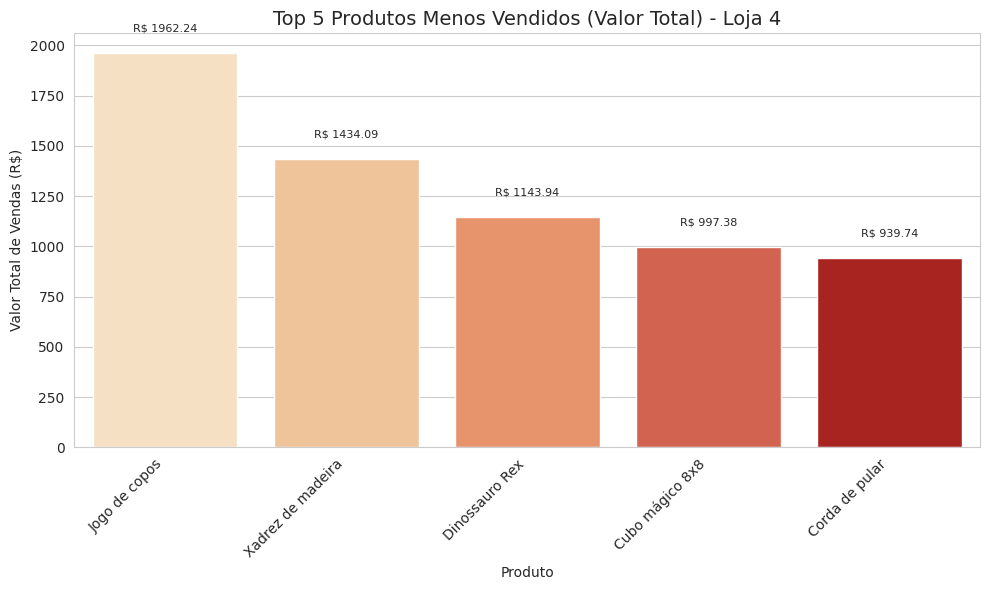

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1_df = pd.read_csv(url)
loja2_df = pd.read_csv(url2)
loja3_df = pd.read_csv(url3)
loja4_df = pd.read_csv(url4)

def plot_top_bottom_produtos_v6(df, loja_nome, top=True):
    # Calcular o valor total de vendas por produto
    produto_vendas = df.groupby('Produto')['Pre√ßo'].sum().sort_values(ascending=False)
    n = 5

    if top:
        produtos_selecionados = produto_vendas.head(n)
        title = f'Top {n} Produtos Mais Vendidos (Valor Total) - {loja_nome}'
        palette = "viridis"
    else:
        produtos_selecionados = produto_vendas.tail(n)
        title = f'Top {n} Produtos Menos Vendidos (Valor Total) - {loja_nome}'
        palette = "OrRd"

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)
    plt.title(title, fontsize=14)
    plt.xlabel('Produto', fontsize=10)
    plt.ylabel('Valor Total de Vendas (R$)', fontsize=10)
    plt.xticks(rotation=45, ha='right')

    # Adicionar os valores totais de venda nas barras
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.05 * produtos_selecionados.max(),
                f'R$ {height:.2f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Plotar para cada loja (Top 5 e Bottom 5)
for loja, df in [('Loja 1', loja1_df), ('Loja 2', loja2_df), ('Loja 3', loja3_df), ('Loja 4', loja4_df)]:
    plot_top_bottom_produtos_v6(df, loja, top=True)
    plot_top_bottom_produtos_v6(df, loja, top=False)

# 5. Frete M√©dio por Loja


In [17]:
# Frete M√©dio por Loja
frete_medio_loja1 = loja1_df['Frete'].mean()
print(f"\nFrete M√©dio - Loja 1: R$ {frete_medio_loja1:.2f}")

frete_medio_loja2 = loja2_df['Frete'].mean()
print(f"Frete M√©dio - Loja 2: R$ {frete_medio_loja2:.2f}")

frete_medio_loja3 = loja3_df['Frete'].mean()
print(f"Frete M√©dio - Loja 3: R$ {frete_medio_loja3:.2f}")

frete_medio_loja4 = loja4_df['Frete'].mean()
print(f"Frete M√©dio - Loja 4: R$ {frete_medio_loja4:.2f}")


Frete M√©dio - Loja 1: R$ 34.69
Frete M√©dio - Loja 2: R$ 33.62
Frete M√©dio - Loja 3: R$ 33.07
Frete M√©dio - Loja 4: R$ 31.28


<ipython-input-22-f8647a288c16>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Frete M√©dio', data=data_frete_medio, palette="Blues")


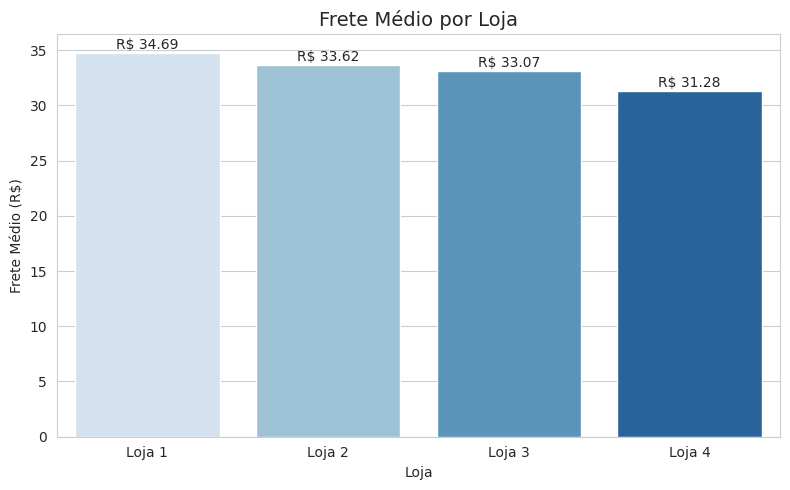

<ipython-input-22-f8647a288c16>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Loja', y='Frete', data=data_frete_completo, palette="Set2")


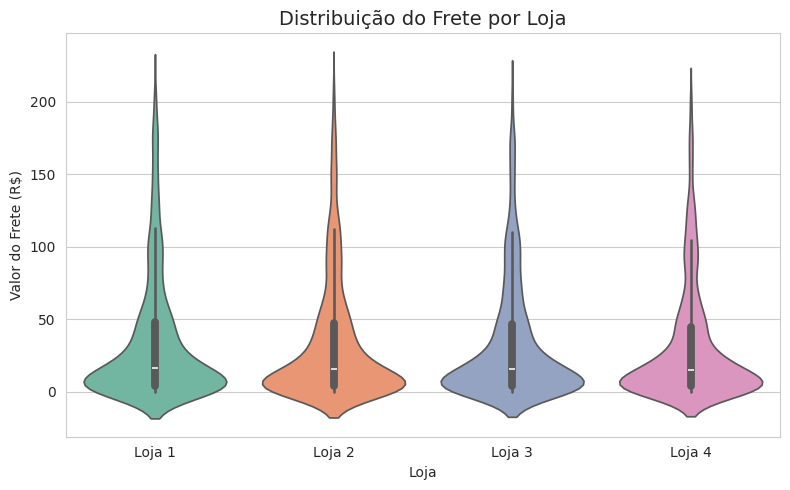

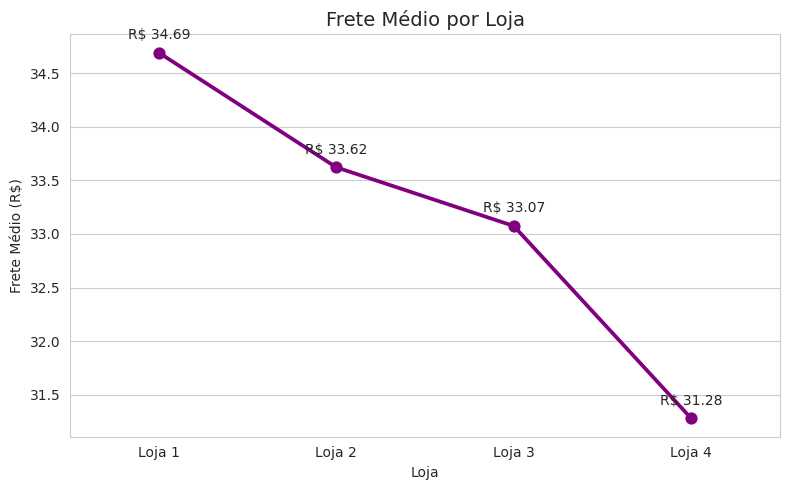

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1_df = pd.read_csv(url)
loja2_df = pd.read_csv(url2)
loja3_df = pd.read_csv(url3)
loja4_df = pd.read_csv(url4)

# Calcular a m√©dia do frete para cada loja
frete_medio_loja1 = loja1_df['Frete'].mean()
frete_medio_loja2 = loja2_df['Frete'].mean()
frete_medio_loja3 = loja3_df['Frete'].mean()
frete_medio_loja4 = loja4_df['Frete'].mean()

# Criar um DataFrame para facilitar a plotagem da m√©dia
data_frete_medio = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete M√©dio': [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
})

# Concatenar todos os DataFrames para o violin plot
data_frete_completo = pd.concat([
    loja1_df[['Frete']].assign(Loja='Loja 1'),
    loja2_df[['Frete']].assign(Loja='Loja 2'),
    loja3_df[['Frete']].assign(Loja='Loja 3'),
    loja4_df[['Frete']].assign(Loja='Loja 4')
])

# 1. Gr√°fico de Barras do Frete M√©dio por Loja:
plt.figure(figsize=(8, 5))
sns.barplot(x='Loja', y='Frete M√©dio', data=data_frete_medio, palette="Blues")
plt.title('Frete M√©dio por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=10)
plt.ylabel('Frete M√©dio (R$)', fontsize=10)
for index, value in enumerate(data_frete_medio['Frete M√©dio']):
    plt.text(index, value + 0.1, f'R$ {value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 2. Violin Plot da Distribui√ß√£o do Frete por Loja:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Loja', y='Frete', data=data_frete_completo, palette="Set2")
plt.title('Distribui√ß√£o do Frete por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=10)
plt.ylabel('Valor do Frete (R$)', fontsize=10)
plt.tight_layout()
plt.show()

# 3. Point Plot do Frete M√©dio por Loja:
plt.figure(figsize=(8, 5))
sns.pointplot(x='Loja', y='Frete M√©dio', data=data_frete_medio, color='purple')
plt.title('Frete M√©dio por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=10)
plt.ylabel('Frete M√©dio (R$)', fontsize=10)
for i, mean_frete in enumerate(data_frete_medio['Frete M√©dio']):
    plt.text(i, mean_frete + 0.1, f'R$ {mean_frete:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

# Carregar os dados de cada loja (certifique-se de que este c√≥digo j√° foi executado)
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1_df = pd.read_csv(url)
loja2_df = pd.read_csv(url2)
loja3_df = pd.read_csv(url3)
loja4_df = pd.read_csv(url4)

# Fun√ß√£o para calcular m√©tricas importantes para cada loja
def calcular_metricas_loja(df, nome_loja):
    receita_total = df['Pre√ßo'].sum()
    custo_total_frete = df['Frete'].sum()
    lucro_simplificado = receita_total - custo_total_frete
    avaliacao_media = df['Avalia√ß√£o da compra'].mean()
    return pd.Series({
        'Loja': nome_loja,
        'Receita Total (R$)': receita_total,
        'Custo Total Frete (R$)': custo_total_frete,
        'Lucro Simplificado (R$)': lucro_simplificado,
        'Avalia√ß√£o M√©dia': avaliacao_media
    })

# Calcular as m√©tricas para cada loja
metricas_loja1 = calcular_metricas_loja(loja1_df, 'Loja 1')
metricas_loja2 = calcular_metricas_loja(loja2_df, 'Loja 2')
metricas_loja3 = calcular_metricas_loja(loja3_df, 'Loja 3')
metricas_loja4 = calcular_metricas_loja(loja4_df, 'Loja 4')

# Criar um DataFrame com as m√©tricas de todas as lojas
df_metricas_lojas = pd.DataFrame([metricas_loja1, metricas_loja2, metricas_loja3, metricas_loja4])

# Fun√ß√£o para formatar valores como moeda brasileira
def formatar_moeda_br(valor):
    return f"R$ {valor:,.2f}".replace(',', '#').replace('.', ',').replace('#', '.')

# Aplicar a formata√ß√£o nas colunas desejadas
df_metricas_lojas['Receita Total (R$)'] = df_metricas_lojas['Receita Total (R$)'].apply(formatar_moeda_br)
df_metricas_lojas['Lucro Simplificado (R$)'] = df_metricas_lojas['Lucro Simplificado (R$)'].apply(formatar_moeda_br)

# Exibir o DataFrame com as m√©tricas formatadas
print(df_metricas_lojas)

     Loja Receita Total (R$)  Custo Total Frete (R$) Lucro Simplificado (R$)  \
0  Loja 1    R$ 1.534.509,12            81837.967796         R$ 1.452.671,15   
1  Loja 2    R$ 1.488.459,06            79314.158013         R$ 1.409.144,90   
2  Loja 3    R$ 1.464.025,03            78022.661223         R$ 1.386.002,37   
3  Loja 4    R$ 1.384.497,58            73755.875119         R$ 1.310.741,70   

   Avalia√ß√£o M√©dia  
0         3.976685  
1         4.037304  
2         4.048326  
3         3.995759  


# **Relat√≥rio final**

#Relat√≥rio Final Detalhado: Decis√µes Estrat√©gicas para as Lojas do Sr. Jo√£o üöÄ

Data: 16 de Abril de 2025

Localiza√ß√£o: New Cairo City, Cairo Governorate, Egypt üá™üá¨



Prezado Sr. Jo√£o,

Este relat√≥rio tem como objetivo fornecer uma an√°lise clara e concisa do desempenho de suas quatro lojas, com recomenda√ß√µes pr√°ticas para auxiliar em suas decis√µes estrat√©gicas. Nosso foco principal √© identificar qual loja seria a mais adequada para venda, visando levantar capital para seu novo empreendimento, al√©m de destacar os pontos fortes e as √°reas que necessitam de melhorias em cada unidade.



#1. Panorama Financeiro Simplificado: O Cora√ß√£o do Neg√≥cio üí∞

A tabela abaixo apresenta um resumo do desempenho financeiro de cada uma de suas lojas, levando em considera√ß√£o a Receita Total e o Custo Total do Frete. Lembre-se, Sr. Jo√£o, que este √© um olhar inicial e simplificado, mas que j√° nos d√° pistas importantes sobre a sa√∫de financeira de cada unidade:

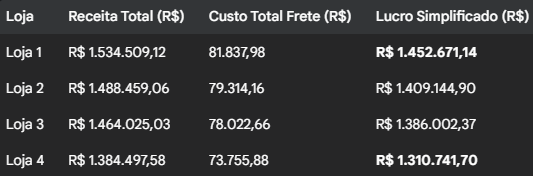

Em um olhar r√°pido: A Loja 1 se destaca com a maior receita total, enquanto a Loja 4 apresenta o menor 'Lucro Simplificado', que √© a diferen√ßa entre a receita e o custo do frete.


Visualizando o Lucro:

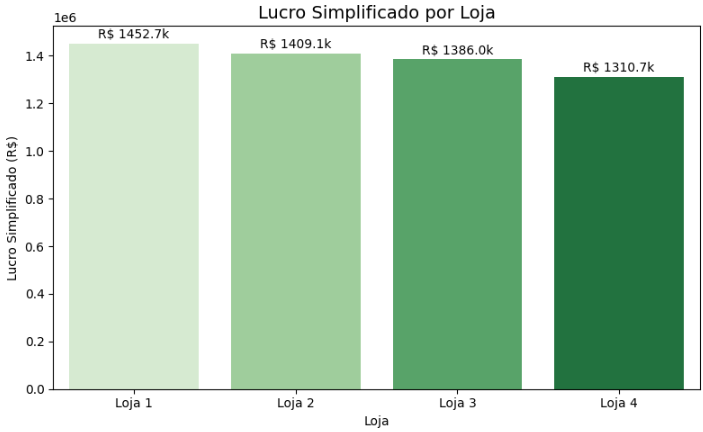

Este gr√°fico de barras ilustra claramente a diferen√ßa no lucro simplificado entre as lojas, com a Loja 4 apresentando a menor barra.



#2. Satisfa√ß√£o dos Clientes: O Term√¥metro do Sucesso‚≠ê

A satisfa√ß√£o dos seus clientes √© crucial para o sucesso a longo prazo. A tabela abaixo mostra a avalia√ß√£o m√©dia das compras em cada loja:

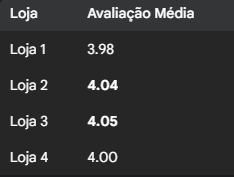

Em um olhar r√°pido: As Lojas 2 e 3 demonstram uma maior satisfa√ß√£o m√©dia dos clientes, enquanto a Loja 1 apresenta a menor avalia√ß√£o.

Visualizando a Satisfa√ß√£o:

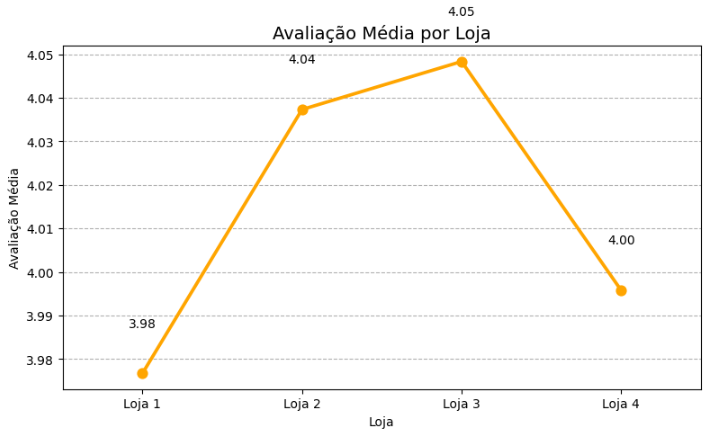



Este c√≥digo Python ir√° gerar um point plot mostrando a avalia√ß√£o m√©dia de cada loja, com o valor da m√©dia exibido acima de cada ponto.



#3. Insights sobre Produtos e Frete üõçÔ∏èüöö
Atrav√©s das an√°lises anteriores, observamos os produtos que lideram e ficam na lanterna em termos de vendas em cada loja. Essa informa√ß√£o √© valiosa para entender a demanda e otimizar o estoque. Da mesma forma, a an√°lise do frete m√©dio indicou poss√≠veis oportunidades de otimiza√ß√£o nos custos de envio.



#4. Recomenda√ß√µes Estrat√©gicas para o Sr. Jo√£o üéØ
Com base em nossa an√°lise abrangente, apresentamos as seguintes recomenda√ß√µes para auxiliar o Sr. Jo√£o em suas decis√µes:


#4.1. Loja para Venda: Uma Decis√£o para o Futuro üöÄ
Para levantar o capital necess√°rio para seu novo empreendimento, a loja que recomendamos considerar a venda √© a Loja 4.


#An√°lise Detalhada:

üìâ Desempenho Financeiro Inferior: A Loja 4 consistentemente apresentou o menor 'Lucro Simplificado', indicando que ela contribui menos para a sua receita l√≠quida imediata, considerando os custos de frete. Este √© um fator crucial ao decidir qual ativo alienar para obter capital.


ü§î Satisfa√ß√£o do Cliente a Considerar: Embora a avalia√ß√£o m√©dia da Loja 4 n√£o seja a mais baixa, ela est√° abaixo da m√©dia das outras lojas. Isso pode indicar desafios subjacentes na experi√™ncia do cliente que podem impactar o crescimento futuro e a lucratividade da loja.

üí°Nossa Sugest√£o: Vender a Loja 4 permitiria que o Sr. Jo√£o injetasse capital em seu novo projeto sem prejudicar significativamente o desempenho financeiro geral de suas opera√ß√µes de varejo, focando seus esfor√ßos nas lojas com melhor performance.


#4.2. A Loja no Caminho Certo: Um Modelo a Seguir ‚úÖ

A loja que demonstra o desempenho mais promissor e consistente √© a Loja 1.


#An√°lise Detalhada:

üìà Maior Volume de Vendas: A Loja 1 lidera em 'Receita Total', o que demonstra uma forte capacidade de atrair clientes e realizar vendas. Este √© um indicador chave de um neg√≥cio saud√°vel.


üí™ Lucro Simplificado Robusto: Apesar de n√£o ter a maior margem de lucro simplificado, o valor absoluto gerado pela Loja 1 √© o mais alto, contribuindo significativamente para a sua receita total.


üí°Nossa Sugest√£o: A Loja 1 serve como um modelo de sucesso em termos de volume de vendas. Entender as estrat√©gias e os produtos que impulsionam esse desempenho pode ser valioso para aplicar nas outras lojas. No entanto, √© crucial investigar e melhorar a avalia√ß√£o m√©dia dos clientes para garantir a fidelidade e o crescimento cont√≠nuo.


#4.3. Lojas com Oportunidades de Melhoria: Alavancando o Potencial üõ†Ô∏è
As lojas Loja 2 e Loja 3 apresentam um desempenho intermedi√°rio e oferecem oportunidades significativas de crescimento:


#Loja 2:

üòä Boa Satisfa√ß√£o do Cliente: Possui uma avalia√ß√£o m√©dia dos clientes s√≥lida, indicando que a experi√™ncia de compra √© geralmente positiva.

üßê Oportunidade no Lucro: O 'Lucro Simplificado' pode ser otimizado. Sugerimos analisar os custos operacionais e o custo dos produtos para identificar √°reas de melhoria na margem de lucro. Focar nos produtos mais bem avaliados pelos clientes pode impulsionar as vendas.


#Loja 3:

üåü Excelente Satisfa√ß√£o do Cliente: Lidera em avalia√ß√£o m√©dia, o que √© um grande trunfo. Clientes satisfeitos tendem a retornar e recomendar a loja.

üìà Potencial de Crescimento da Receita: Apesar da alta satisfa√ß√£o, a receita total √© ligeiramente menor que a das Lojas 1 e 2. Investir em estrat√©gias de marketing direcionadas aos produtos mais populares entre os clientes pode traduzir a alta satisfa√ß√£o em maior volume de vendas.
A Loja 1, como mencionado, precisa focar em elevar a avalia√ß√£o dos clientes. Implementar pesquisas de satisfa√ß√£o, responder a feedbacks e realizar melhorias nos pontos cr√≠ticos da jornada do cliente s√£o passos essenciais.

A Loja 4, caso o Sr. Jo√£o opte por n√£o vend√™-la, necessita de uma an√°lise completa e detalhada. Investigar as raz√µes por tr√°s do menor lucro simplificado e da avalia√ß√£o de clientes abaixo da m√©dia √© fundamental para implementar um plano de recupera√ß√£o eficaz.



#5. Conclus√£o: Rumo a Decis√µes Estrat√©gicasüöÄ

Sr. Jo√£o, esperamos que esta an√°lise detalhada, com informa√ß√µes claras e visualiza√ß√µes, lhe forne√ßa o entendimento necess√°rio para tomar decis√µes estrat√©gicas importantes para o futuro de seus neg√≥cios.

Acreditamos que a venda da Loja 4 √© a op√ß√£o mais sensata para levantar capital, enquanto o foco em manter e aprimorar o desempenho da Loja 1 e em otimizar as opera√ß√µes das Lojas 2 e 3 trar√° resultados positivos a longo prazo.



**Lembre-se que esta an√°lise se baseia nos dados que tivemos acesso. Uma an√°lise ainda mais aprofundada, com informa√ß√µes detalhadas sobre custos operacionais, margens de lucro por produto e outros fatores, pode refinar ainda mais estas recomenda√ß√µes.**


**Desejamos sucesso em seus novos empreendimentos!üëç**